# Boston House Price

1. 利用python的sklearn库（线性回归，lasso回归，岭回归，弹性网络算法）对给定数据集进行预测分析。
2. 分析线性回归算法的实现流程
3. 分析代价函数的构造、梯度下降的实现、回归算法的构建过程；
4. 根据算法描述编程实现算法，调试运行；
5. 对所给数据集进行验算，得到分析结果。

## 导入Jupyterthemes(画图)

In [1]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

## 导入Python模块

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.datasets as datasets

#机器分类算法模型
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

#切割训练数据和样本数据
from sklearn.model_selection import train_test_split

#用于模型评分
from sklearn.metrics import r2_score

## 加载波士顿房价数据

In [3]:
boston = datasets.load_boston()
train = boston.data
target = boston.target
boston_pd = pd.DataFrame(train, columns=boston.feature_names)
boston_pd['PRICE'] = target # 增加target这一列，作为Price

## 分析数据

In [4]:
boston_pd.head()
# CRIM    城镇人均犯罪率
# ZN    住宅用地所占面积
# INDUS    城镇中非商业用地所占面积
# CHAS    是否毗邻查尔斯河
# NOX    环保指标
# RM    每栋住宅的房间数
# AGE    1940年建成的自助单位的比例
# DIS    距离波士顿就业中心的距离
# RAD    距离高速公路的便利指数
# TAX    每一万美元的不动产率
# PTRATIO    城镇中教师学生比例
# B    黑人的比例
# LSTAT    地区中有多少百分比的房东属于低收入阶层
# MEDV 自助房屋房价中位数

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
print "Boston housing dataset has {} data points with {} variables each.".format(*boston_pd.shape)

Boston housing dataset has 506 data points with 14 variables each.


> 数据有506个样本 14-1=13个特征

In [6]:
#计算价值的最小值
minimum_price = np.min(boston_pd['PRICE'])

#计算价值的最大值
maximum_price = np.max(boston_pd['PRICE'])

#计算价值的平均值
mean_price = np.mean(boston_pd['PRICE'])

#计算价值的中值
median_price = np.median(boston_pd['PRICE'])

#计算价值的标准差
std_price = np.std(boston_pd['PRICE'])

#输出计算的结果
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $5.00
Maximum price: $50.00
Mean price: $22.53
Median price $21.20
Standard deviation of prices: $9.19


> 最低房价: 5.00
最高房价: 50.00
平均数: 22.53
中位数 21.20
标准差: 9.19

## 可视化部分特征与Lable的关系

### 1. 犯罪率(CRIM)与房价关系

Text(0,0.5,'Price')

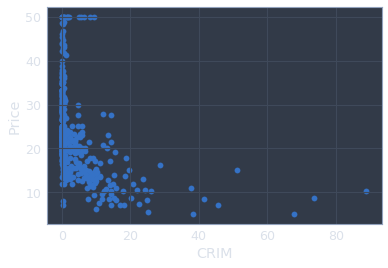

In [7]:
plt.scatter(boston_pd.CRIM, boston_pd.PRICE)
plt.xlabel('CRIM')
plt.ylabel('Price')

> 从散点图可以直观的看出：犯罪率越低，地方越安全，房价越高

### 2. CHAS(Charles River)与房价关系

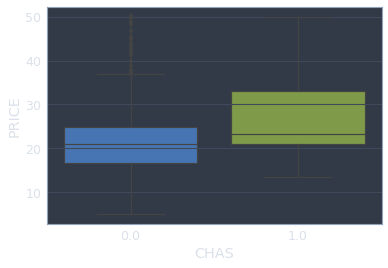

In [8]:
import seaborn as sns
sns.boxplot(data=boston_pd, x='CHAS', y='PRICE')

> 从箱线图可以直观的看出：湖景房（右）跟非湖景房（左）比平均价格高不少

### 3. 接下来看看其他因素的影响——挑出10所最贵的房子

In [9]:
TOP_10 = boston_pd.sort_values(by='PRICE', ascending=False)[:10]
TOP_10

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
283,0.01501,90.0,1.21,1.0,0.4010,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
369,5.66998,0.0,18.10,1.0,0.6310,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.10,1.0,0.6310,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0
371,9.23230,0.0,18.10,0.0,0.6310,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0
372,8.26725,0.0,18.10,1.0,0.6680,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0


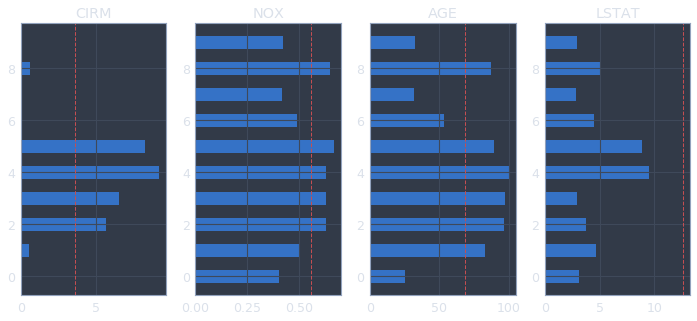

In [10]:
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(141)
plt.title('CIRM')
plt.barh(np.arange(10), TOP_10.CRIM, height=0.5)
plt.axvline(x=boston_pd.CRIM.mean(), color='r', ls='--', lw=1)

ax1 = fig.add_subplot(142)
plt.title('NOX')
plt.barh(np.arange(10), TOP_10.NOX, height=0.5)
plt.axvline(x=boston_pd.NOX.mean(), color='r', ls='--', lw=1)

ax1 = fig.add_subplot(143)
plt.title('AGE')
plt.barh(np.arange(10), TOP_10.AGE, height=0.5)
plt.axvline(x=boston_pd.AGE.mean(), color='r', ls='--', lw=1)

ax1 = fig.add_subplot(144)
plt.title('LSTAT')
plt.barh(np.arange(10), TOP_10.LSTAT, height=0.5)
plt.axvline(x=boston_pd.LSTAT.mean(), color='r', ls='--', lw=1)

> 说到这个犯罪率，看样子不怕贼偷，就怕贼惦记啊，可能就盗窃案还真可能富人区发生的概率更高，毕竟随手顺走点东西搞不好就是值钱货；而作为氮氧化污染物，若是一个城市整体的空气质量不佳，钱再多装啥新风系统也作用不是很大，看起来的确保护环境人人有责；而房龄这个因素，发现高房价区域很大部分房龄超过50年了（哥，拆迁办不给力啊）；最后一个因素低收入人群比例这个区域远远低于平均数，说明一个问题：能买得起房子的都是有钱人，特别是贵的房子。这不是废话吗23333


## 利用```train_test_split``` 划分训练集和测试集

In [11]:
#切割数据样本集合测试集
X_train,x_test,y_train,y_true = train_test_split(train,target,test_size=0.2)

> 一个模型需要测试数据去评价，通过测试数据可以知道一个模型在独立数据集上的表现；同时测试数据还能用来检验过拟合以及欠拟合。利用测试集对训练出来的模型进行验证，可以提高模型的泛化能力。关于为什么要把训练集和测试集分为80% / 20%，在网上找了很多解释似乎都指向了玄学范畴，但是我个人理解的是，太少的训练集合会导致数据极度容易过拟合，而且小的训练集合里面会包含不少噪音，这就很难弄出复杂度稍微高一点的模型；而过多的训练集则会很难准确验证模型的泛化能力。玄学方案一般采用$\frac 2 3 到 \frac 4 5$的数据作为训练集。

## 创建学习模型

In [12]:
knn = KNeighborsRegressor()
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
decision = DecisionTreeRegressor()
svr = SVR()

## 训练模型

In [13]:
knn.fit(X_train,y_train)
linear.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)
decision.fit(X_train,y_train)
svr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## 预测数据

In [14]:
y_pre_knn = knn.predict(x_test)
y_pre_linear = linear.predict(x_test)
y_pre_ridge = ridge.predict(x_test)
y_pre_lasso = lasso.predict(x_test)
y_pre_decision = decision.predict(x_test)
y_pre_svr = svr.predict(x_test)

## 评分(按降序)

KNN = 0.581080662004
linear_score = 0.715955247054
ridge_score = 0.708706446551
lasso_score = 0.64465814953
decision_score = 0.833619677698
svr_score = 0.0030765675448



<BarContainer object of 6 artists>

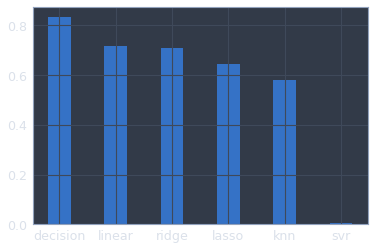

In [15]:
knn_score = r2_score(y_true,y_pre_knn)
linear_score=r2_score(y_true,y_pre_linear)
ridge_score=r2_score(y_true,y_pre_ridge)
lasso_score=r2_score(y_true,y_pre_lasso)
decision_score=r2_score(y_true,y_pre_decision)
svr_score=r2_score(y_true,y_pre_svr)
# display(knn_score,linear_score,ridge_score,lasso_score,decision_score,svr_score)
print "KNN = %s\nlinear_score = %s\nridge_score = %s\nlasso_score = %s\ndecision_score = %s\nsvr_score = %s\n"%(knn_score,linear_score,ridge_score,lasso_score,decision_score,svr_score)
method = ['knn','linear','ridge','lasso','decision','svr']
score = [knn_score, linear_score, ridge_score, lasso_score, decision_score, svr_score]
s = pd.DataFrame(data=score,index=method)
ss = s.sort_values(by=0,ascending=False)
fig = plt.figure()  
plt.bar(ss.index, ss[0],0.4)  

## 可视化

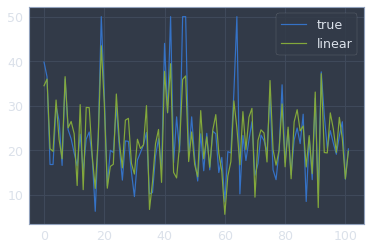

In [16]:
# #KNN
# plt.plot(y_true,label='true')
# plt.plot(y_pre_knn,label='knn')
# plt.legend()

# #Linear
plt.plot(y_true,label='true')
plt.plot(y_pre_linear,label='linear')
plt.legend()

# #Ridge
# plt.plot(y_true,label='true')
# plt.plot(y_pre_ridge,label='ridge')
# plt.legend()

# #lasso
# plt.plot(y_true,label='true')
# plt.plot(y_pre_lasso,label='lasso')
# plt.legend()

#decision
# plt.plot(y_true,label='true')
# plt.plot(y_pre_decision,label='decision')
# plt.legend()

# #SVR
# plt.plot(y_true,label='true')
# plt.plot(y_pre_svr,label='svr')
# plt.legend()

